In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mceq_config as config
from MCEq.core import MCEqRun
import crflux.models as pm
import scienceplots
import scipy.optimize as opt
from utils.helpers import *
from csmodification_analyzer import SensitivityAnalyzer

In [17]:
plot_dir = '/home/khymon/Plots/cs-analysis/'

In [3]:
doy = doys(5)

In [5]:
x_max

array([201., 196., 196., 161., 131., 136., 141., 131., 121., 111., 101.,
        81.,  11.,   0.])

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


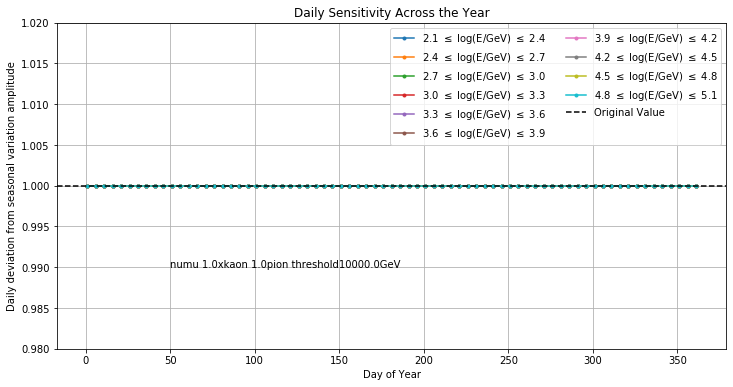

In [5]:
analyzer = SensitivityAnalyzer(ptype='numu', scale_factor_p=1., scale_factor_k=1., doys=doy, threshold=1.e4, increase='const',interactionmodel='SIBYLL2.3c')
analyzer.load_data()
x_min_def, x_max_def, y_min_def, y_max_def, min_indices_def, max_indices_def = analyzer.season_analysis()

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


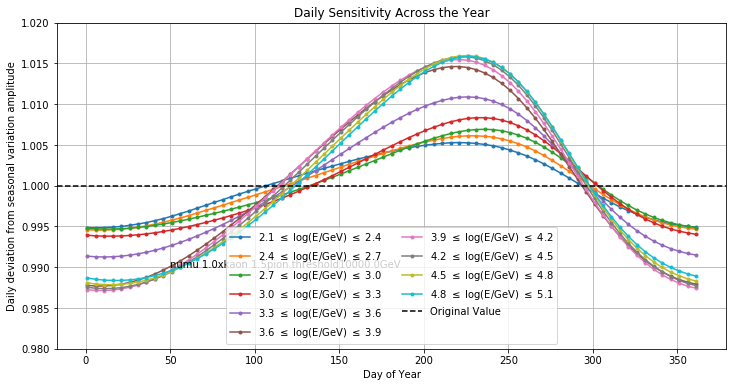

In [6]:
analyzer = SensitivityAnalyzer(ptype='numu', scale_factor_p=1.5, scale_factor_k=1., doys=doy, threshold=1.e4, increase='const',interactionmodel='SIBYLL2.3c')
analyzer.load_data()
x_min_15, x_max_15, y_min_15, y_max_15, min_indices_15, max_indices_15 = analyzer.season_analysis()

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


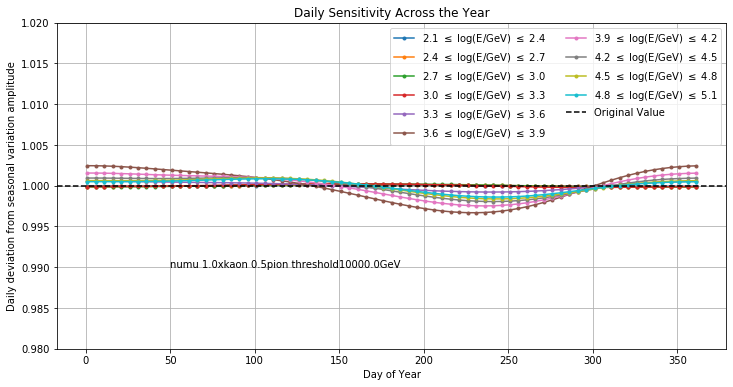

In [7]:
analyzer = SensitivityAnalyzer(ptype='numu', scale_factor_p=0.5, scale_factor_k=1., doys=doy, threshold=1.e4, increase='const',interactionmodel='SIBYLL2.3c')
analyzer.load_data()
x_min_05, x_max_05, y_min_05, y_max_05, min_indices_05, max_indices_05 = analyzer.season_analysis()

In [8]:
ebins = analyzer.ebins_analysis()
bin_mids = (ebins[:-1] + ebins[1:]) / 2

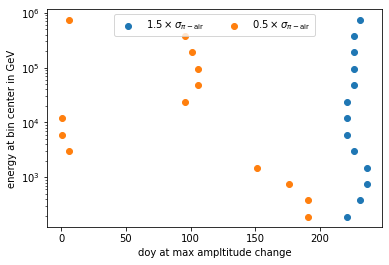

In [24]:
#plt.scatter(x_max_def,bin_mids,label = 'default')
plt.scatter(x_max_15,bin_mids,label = r'$1.5\times \sigma_{\pi -\mathrm{air}}$')
plt.scatter(x_max_05,bin_mids,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$')
plt.xlabel('doy at max ampltitude change')
plt.ylabel('energy at bin center in GeV')
plt.yscale('log')
plt.legend(ncol=3,loc='upper center')

plt.savefig(plot_dir + 'xshift_numu_pi-air.png',bbox_inces= 'tight')


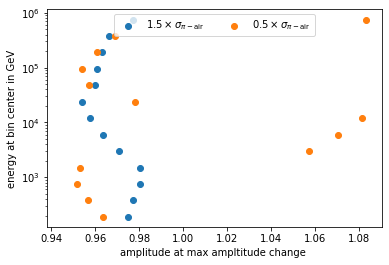

In [25]:
plt.scatter(y_max_15,bin_mids,label = r'$1.5\times \sigma_{\pi -\mathrm{air}}$')
plt.scatter(y_max_05,bin_mids,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$')
plt.xlabel('amplitude at max ampltitude change ')
plt.ylabel('energy at bin center in GeV')
plt.yscale('log')
plt.legend(ncol=3,loc='upper center')

plt.savefig(plot_dir + 'yshift_numu_pi-air.png',bbox_inces= 'tight')

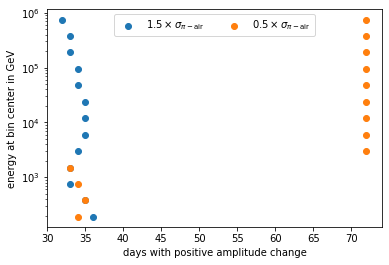

In [29]:
plt.scatter([max_val - min_val for max_val, min_val in zip(max_indices_15, min_indices_15)],bin_mids,label = r'$1.5\times \sigma_{\pi -\mathrm{air}}$')
plt.scatter([max_val - min_val for max_val, min_val in zip(max_indices_05, min_indices_05)],bin_mids,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$')
plt.xlabel('days with positive amplitude change')
plt.ylabel('energy at bin center in GeV')
plt.yscale('log')
plt.legend(ncol=3,loc='upper center')

plt.savefig(plot_dir + 'positive-amplitude-change_numu_pi-air.png',bbox_inces= 'tight')

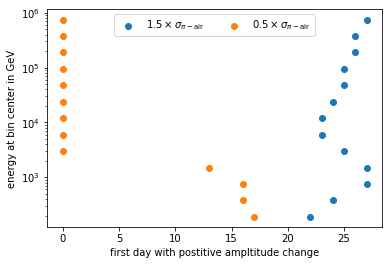

In [32]:
plt.scatter(min_indices_15,bin_mids,label = r'$1.5\times \sigma_{\pi -\mathrm{air}}$')
plt.scatter(min_indices_05,bin_mids,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$')
plt.xlabel('first day with postitive ampltitude change')
plt.ylabel('energy at bin center in GeV')
plt.yscale('log')
plt.legend(ncol=3,loc='upper center')

plt.savefig(plot_dir + 'min-index-pos-ampltitude-change_numu_pi-air.png',bbox_inces= 'tight')

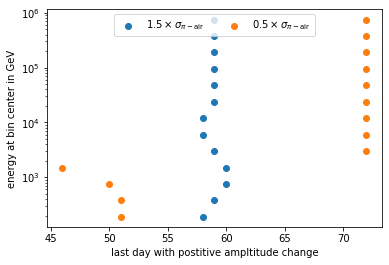

In [33]:
plt.scatter(max_indices_15,bin_mids,label = r'$1.5\times \sigma_{\pi -\mathrm{air}}$')
plt.scatter(max_indices_05,bin_mids,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$')
plt.xlabel('last day with postitive ampltitude change')
plt.ylabel('energy at bin center in GeV')
plt.yscale('log')
plt.legend(ncol=3,loc='upper center')

plt.savefig(plot_dir + 'max-index-pos-ampltitude-change_numu_pi-air.png',bbox_inces= 'tight')

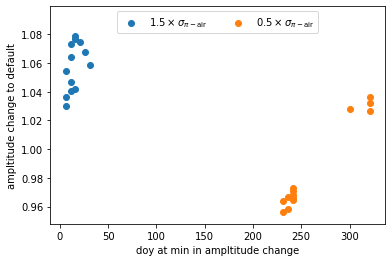

In [34]:
plt.scatter(x_min_15,y_min_15,label = r'$1.5\times \sigma_{\pi -\mathrm{air}}$')
plt.scatter(x_min_05,y_min_05,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$')
plt.xlabel('doy at min in ampltitude change')
plt.ylabel('ampltitude change to default')
plt.legend(ncol=3,loc='upper center')

plt.savefig(plot_dir + 'min-xy_numu_pi-air.png',bbox_inces= 'tight')

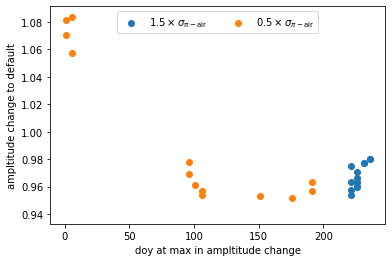

In [37]:
plt.scatter(x_max_15,y_max_15,label = r'$1.5\times \sigma_{\pi -\mathrm{air}}$')
plt.scatter(x_max_05,y_max_05,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$')
plt.xlabel('doy at max in ampltitude change')
plt.ylabel('ampltitude change to default')
plt.legend(ncol=3,loc='upper center')

plt.savefig(plot_dir + 'max-xy_numu_pi-air.png',bbox_inces= 'tight')

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


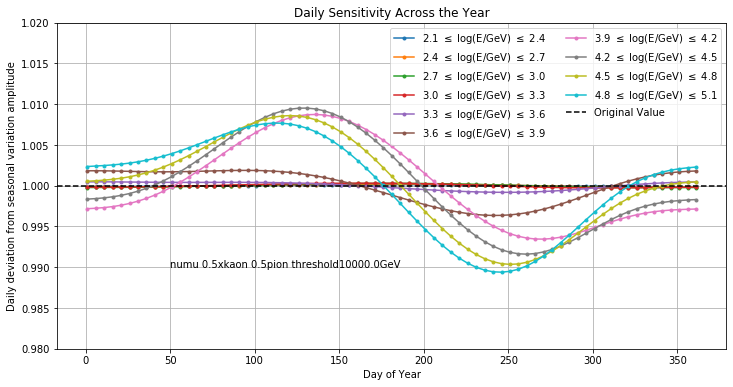

In [39]:
# additional reduction of K-air cs

analyzer = SensitivityAnalyzer(ptype='numu', scale_factor_p=0.5, scale_factor_k=0.5, doys=doy, threshold=1.e4, increase='const',interactionmodel='SIBYLL2.3c')
analyzer.load_data()
x_min_05_kp, x_max_05_kp, y_min_05_kp, y_max_05_kp, min_indices_05_kp, max_indices_05_kp = analyzer.season_analysis()

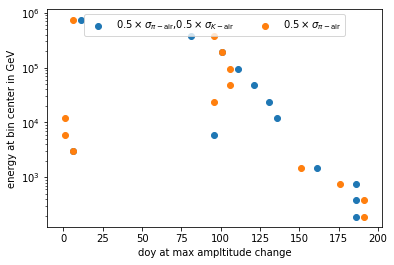

In [40]:
plt.scatter(x_max_05_kp,bin_mids,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$,$0.5\times \sigma_{K -\mathrm{air}}$')
plt.scatter(x_max_05,bin_mids,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$')
plt.xlabel('doy at max ampltitude change')
plt.ylabel('energy at bin center in GeV')
plt.yscale('log')
plt.legend(ncol=3,loc='upper center')

plt.savefig(plot_dir + 'xshift_numu_pi-air_k-air.png',bbox_inces= 'tight')

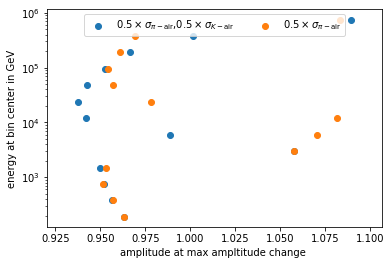

In [41]:
plt.scatter(y_max_05_kp,bin_mids,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$,$0.5\times \sigma_{K -\mathrm{air}}$')
plt.scatter(y_max_05,bin_mids,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$')
plt.xlabel('amplitude at max ampltitude change ')
plt.ylabel('energy at bin center in GeV')
plt.yscale('log')
plt.legend(ncol=3,loc='upper center')

plt.savefig(plot_dir + 'yshift_numu_pi-air_K-air.png',bbox_inces= 'tight')

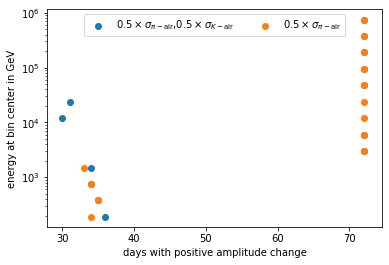

In [42]:
plt.scatter([max_val - min_val for max_val, min_val in zip(max_indices_05_kp, min_indices_05_kp)],bin_mids,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$,$0.5\times \sigma_{K -\mathrm{air}}$')
plt.scatter([max_val - min_val for max_val, min_val in zip(max_indices_05, min_indices_05)],bin_mids,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$')
plt.xlabel('days with positive amplitude change')
plt.ylabel('energy at bin center in GeV')
plt.yscale('log')
plt.legend(ncol=3,loc='upper center')

plt.savefig(plot_dir + 'positive-amplitude-change_numu_pi-air_K-air.png',bbox_inces= 'tight')

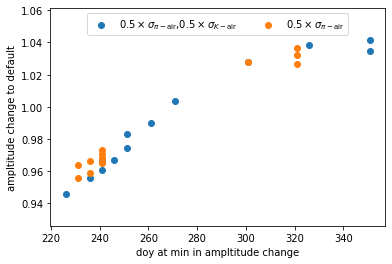

In [43]:
plt.scatter(x_min_05_kp,y_min_05_kp,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$,$0.5\times \sigma_{K -\mathrm{air}}$')
plt.scatter(x_min_05,y_min_05,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$')
plt.xlabel('doy at min in ampltitude change')
plt.ylabel('ampltitude change to default')
plt.legend(ncol=3,loc='upper center')

plt.savefig(plot_dir + 'min-xy_numu_pi-air_K-air.png',bbox_inces= 'tight')

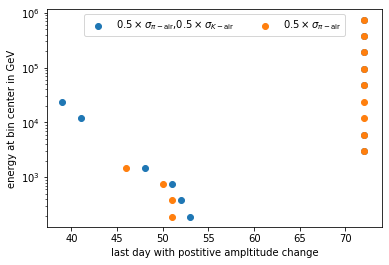

In [44]:
plt.scatter(max_indices_05_kp,bin_mids,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$,$0.5\times \sigma_{K -\mathrm{air}}$')
plt.scatter(max_indices_05,bin_mids,label = r'$0.5\times \sigma_{\pi -\mathrm{air}}$')
plt.xlabel('last day with postitive ampltitude change')
plt.ylabel('energy at bin center in GeV')
plt.yscale('log')
plt.legend(ncol=3,loc='upper center')

plt.savefig(plot_dir + 'max-index-pos-ampltitude-change_numu_pi-air_K-air.png',bbox_inces= 'tight')